## Coffee Review Data Analysis 

As a casual but passionate coffee drinker, I wanted to analyze coffee reviews posted online to see if I can get a better understanding of important characteristics of different types of coffee beans. Not only that, I wanted to see if certain coffee types received higher ratings than other types. For the data, I web scrapped through coffeereviews.com reviews that began as early as 1997. 

For this data analysis I will do the following: 
- Exploratory Data Analysis 
- Attempt at making a coffee classifier through Machine Learning
- Create wordclouds to get qualitative insight into the description words to describe a certain type of coffee bean



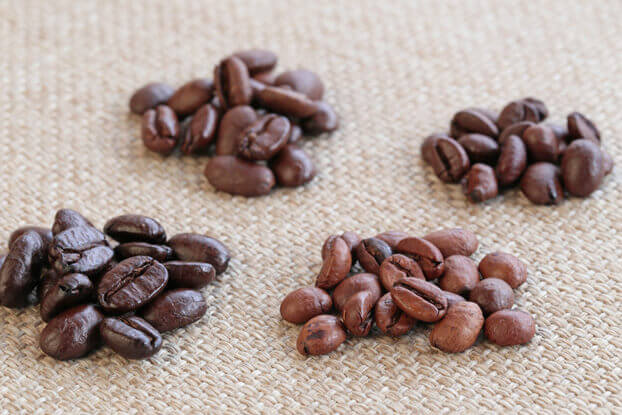


In this notebook, I use BeautifulSoup and requests to get the necessary data I need for my analysis. 

In [1]:
import numpy as np 
import pandas as pd 
import csv 
import requests
from bs4 import BeautifulSoup 
import urllib.request
from urllib.request import urlopen

In [2]:
headers = {"User-Agent":"Mozilla/5.0 (X11; CrOS aarch64 13505.63.0) AppleWebKit/537.36 (KHTML, like Gecko)"}
cof_rev_link = "https://www.coffeereview.com/review/page/2/"
page = requests.get(cof_rev_link, headers=headers)
src = page.content
soup = BeautifulSoup(src, "lxml")

print(page) #200 --> good to go

<Response [200]>


## Webscrapping Data

For the webscrapping process, I start from page 2, as the url from the first page differs from the 2nd page onwards. Every page after the first page uses the same url but the page number at the end of the url; therefore, it's easier to work from page 2. Analyzing the webpage reveals the necessary components I need to access the urls that lead to each individual coffee review on the reviews page. 

In [3]:
coffee = "https://www.coffeereview.com/review/page/2/"
page_col = requests.get(coffee, headers=headers)
src_col = page_col.content
soup_col = BeautifulSoup(src_col, "lxml")

links = soup_col.find_all('p', {"class": "review-title"})

for link in links: 
    link = link.find('a')
    link = link.attrs['href']
   


In [12]:
name = []
ratings = []
c_origin = []
roast_lvl = []
agtron_num = []
price = []
aroma_lvl = []
acidity_lvl = []
flavor_lvl = []
aftertaste_lvl = []
b_review = []

for num in range(2,189):
    base_link = "https://www.coffeereview.com/review/page/" +str(num) + "/"
    base_page = requests.get(base_link, headers=headers)
    base_src = base_page.content
    base_soup = BeautifulSoup(base_src, "lxml")
    links = base_soup.find_all('p', {"class": "review-title"})
    for link in links: 
        link = link.find('a')
        link = link.attrs['href']
        page = requests.get(link, headers=headers)
        src = page.content
        soup = BeautifulSoup(src, "lxml")
        
        ####################################################################
    
        product_name = soup.find("h1",{"class":"review-title"})
        rating = soup.find("span",{"class":"review-template-rating"})
        origin = soup.find("table",{"class":"review-template-table"})
        origin = origin.find_all("tr")

        labels = []
        infos = []
        for tr in origin[0:6]: 
            label = tr.find_all('td')[0].text
            info = tr.find_all('td')[1].text

            labels.append(label)
            infos.append(info)

        blind_taste = soup.find_all("p")
        blind_taste = blind_taste[4].get_text()
        
        ########################################################################

        char = soup.find_all("table",{"class":"review-template-table"})
        char = char[1].find_all("tr")

        labels2 = []
        infos2 = []
        for tr in char[0:6]: 
            label2 = tr.find_all('td')[0].text
            info2 = tr.find_all('td')[1].text


            labels2.append(label2)
            infos2.append(info2)
            
    

        try:
            name.append(product_name.text)
            ratings.append(rating.text)
            c_origin.append(infos[1])
            roast_lvl.append(infos[2])
            agtron_num.append(infos[3])
            price.append(infos[4])
        
        except: 
            continue
        
    
        try:
            aroma_lvl.append(infos2[1])
            acidity_lvl.append(infos2[2])
            flavor_lvl.append(infos2[3])
            aftertaste_lvl.append(infos2[4])
            b_review.append(blind_taste[18:])
       
        except:
            continue



## Cleaning and Sorting Data into a Dataframe
After getting the data, I put the data into easy to read and accessible columns. 

In [21]:
data = [name, ratings, c_origin, roast_lvl, agtron_num, price, aroma_lvl, acidity_lvl, flavor_lvl, aftertaste_lvl, b_review]

df = pd.DataFrame(data, index = ["Product_Name","Rating","Coffee_Origin","Roast_level", "Agtron","Est.Price","Aroma_level",
                                 "Acidity_level", "Flavor_level","Aftertaste_level","Blind_assesment"]).T

df2 = df.copy()

In [22]:
df

,Product_Name,Rating,Coffee_Origin,Roast_level,Agtron,Est.Price,Aroma_level,Acidity_level,Flavor_level,Aftertaste_level,Blind_assesment
0,Colombia Planadas,92,"Tolima Department, Colombia",Medium-Light,52/70,$15.00/12 ounces,9,8,8\t\t\t\t\t\t,9,Chocolaty and sweetly nut-toned. Baking chocol...
1,Ethiopia Sidama Bensa Bekele,91,"Sidamo (also Sidama) growing region, south-cen...",Medium-Light,57/77,$21.00/12 ounces,8,8,8\t\t\t\t\t\t,9,"Crisply sweet, citrusy. Orange zest, cocoa pow..."
2,Bowstring Christmas Blend,92,Africa; Central America,Medium,50/66,$20.00/12 ounces,9,8,8\t\t\t\t\t\t,9,"Sweet-toned, chocolaty. Baking chocolate, date..."
3,Peru Yanesha Geisha,94,"Pasco Department, Villa Rica, Peru",Medium-Light,61/79,NT $450/8 ounces,9,9,9\t\t\t\t\t\t,9,"Deeply floral, cocoa-toned. Lilac, dark chocol..."
4,Vertical Support Espresso,90,Not disclosed,Medium,46/60,$14.00/12 ounces,8,8\t\t\t\t\t\t,9,7,Evaluated as espresso. Chocolaty and nut-toned...
...,...,...,...,...,...,...,...,...,...,...,...
3735,Zambia Nunama Ndola,89,Central Zambia,Medium-Dark,39/51,$12.50/16 oz.,None,None,None,None,None
3736,Chuck Roast Guatemala SHB,90,"San Marcos growing region, southwestern Guatem...",Medium-Dark,40/46,$11.00/16 oz.,None,None,None,None,None
3737,Organic Colombia Rainforest Alliance Certified,91,Colombia,Medium,49/64,$12.35/12 oz.,None,None,None,None,None
3738,Sulawesi Pulupulu Toraja,91,"Toraja growing region, southwestern Sulawesi, ...",Medium-Light,57/70,$16.95/16 oz.,None,None,None,None,None


In [16]:
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


## Looking for Null/Missing Data points + Exporting data
For later data analysis purposes, I wanted to see where the null values were in my data set if any using this heatmap. It shows that 8-9 reviews are missing some data in the columns. Since it is less than 1% of my total data, I opted to drop those data points, as it would not significantly affect data analysis. Now the data is ready to use and be exported as an Excel/csv file. 

Product_Name        0
Rating              0
Coffee_Origin       0
Roast_level         0
Agtron              0
Est.Price           1
Aroma_level         8
Acidity_level       8
Flavor_level        8
Aftertaste_level    9
Blind_assesment     9
dtype: int64

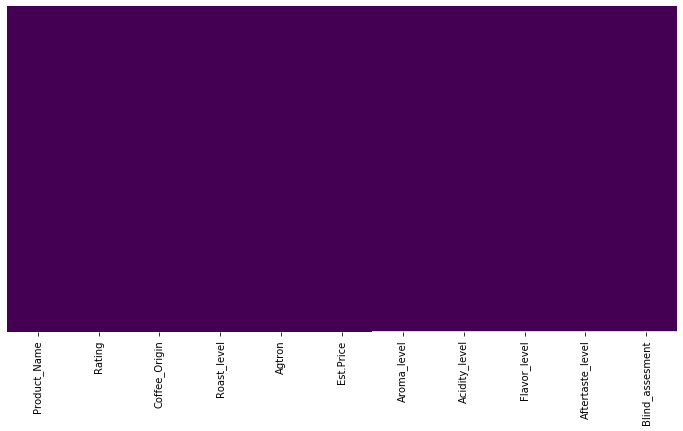

In [23]:
plt.figure(figsize =(12,6))
sns.heatmap(df.isnull(), cmap = 'viridis', yticklabels = False, cbar = False)

df.isnull().sum()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3740 entries, 0 to 3739
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product_Name      3740 non-null   object
 1   Rating            3740 non-null   object
 2   Coffee_Origin     3740 non-null   object
 3   Roast_level       3740 non-null   object
 4   Agtron            3740 non-null   object
 5   Est.Price         3739 non-null   object
 6   Aroma_level       3732 non-null   object
 7   Acidity_level     3732 non-null   object
 8   Flavor_level      3732 non-null   object
 9   Aftertaste_level  3731 non-null   object
 10  Blind_assesment   3731 non-null   object
dtypes: object(11)
memory usage: 321.5+ KB


In [29]:
df.dropna(axis=0, inplace=True)

In [32]:
df.to_csv('Coffee_Reviews_data_3.csv')